# Partie 2: Classification

### Préparation
Dans cette partie, nous ferons du data mining sur les données.

In [1]:
# Lecture des données
library(readr)
data <- read_csv("Data/DataEnergy.csv")

Parsed with column specification:
cols(
  Relative.compactness = col_double(),
  Surface.area = col_double(),
  Wall.area = col_double(),
  Roof.area = col_double(),
  Overall.height = col_double(),
  orientation = col_character(),
  Glazing.area = col_double(),
  Glazing.area.distr = col_double(),
  Energy = col_double(),
  Energy.efficiency = col_character()
)


In [2]:
### Verification du contenu: statistique descriptive unidimentionnelle

head(data) # resumé des données
data$orientation=as.factor(data$orientation) # On transforme les variables qualitatives en facteur
data$Glazing.area.distr=as.factor(data$Glazing.area.distr)
data$Energy.efficiency=as.factor(data$Energy.efficiency)


Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 East        -1.612145e-02 0                  41.90847 C

## Importation des librairies

In [3]:
#install.packages("Deducer")
# install.packages("caret")
# install.packages("ROCR")
# install.packages("MASS")
# install.packages("pROC")
# install.packages("rpart")

In [4]:
# Importation des libraries necessaires pour l'exeution des codes
# library (Deducer)
library(caret)
library(ROCR)
library(MASS)
# library(pROC)
library(rpart)
library(rpart.plot)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ROCR' was built under R version 3.6.3"Warning message:
"package 'rpart' was built under R version 3.6.3"

ERROR: Error in library(rpart.plot): there is no package called 'rpart.plot'


## Processus de Division du jeux de données: Apprentissage-Test

In [6]:
#dimension des données
dim(data)
#fréquences relatives des classes
print(prop.table(table(data$Energy.efficiency)))
#set.seed pour rendre reproductible les résultats 
set.seed(100) 
print(set.seed(100))

#On Partitionne les données en données d'apprentissage et de test. 
y=data$Energy.efficiency
print(length(y))
library(caret)
library(e1071)
partition <- createDataPartition(y, times = 1, p = 0.7, list =F) 




[1] 768  10


        A         B         C         D         E         F         G 
0.2708333 0.1419271 0.1041667 0.1028646 0.1419271 0.1328125 0.1054688 
NULL
[1] 768


## Subdivision apprentissage-test

In [7]:


#data frame pour les individus en apprentissage
DataTrain <- data[partition,] 
print(dim(DataTrain))
head(DataTrain)

#data frame pour les individus en test
DataTest <- data[-partition,] 
print(dim(DataTest))
head(DataTest)

#fréquences absolues des classes - éch. d'apprentissage
print(table(DataTrain$Energy.efficiency))

#fréquences relatives des classes dans l'éch. d'apprentissage 
print(prop.table(table(DataTrain$Energy.efficiency)))

#fréquences absolues des classes - éch. Test
print(table(DataTest$Energy.efficiency))

#fréquences relatives des classes - éch. Test
print(prop.table(table(DataTest$Energy.efficiency)))



Warning message:
"The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

[1] 541  10


Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.9031505            559.7491     320.9447  119.4022  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 South       -2.477763e-03 0                  40.34359 C

[1] 227  10


Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.8909102            558.6037     314.9162  121.8437  7             
2 0.8554034            596.2685     298.7158  148.7764  7             
3 0.8226011            608.9104     313.4738  147.7183  7             
4 0.8240845            617.1164     320.8470  148.1347  7             
5 0.7883421            636.2563     348.0241  144.1161  7             
6 0.7956036            630.7854     341.1309  144.8273  7             
  orientation Glazing.area Glazing.area.distr Energy   Energy.efficiency
1 East        -0.016121452 0                  41.90847 C                
2 East        -0.009540551 0                  46.98544 D                
3 East        -0.007442304 0                  41.56658 C                
4 West         0.008506713 0                  34.65949 B                
5 East         0.001517881 0                  62.08273 E                
6 South       -0.002210213 0                  63.47804 E


  A   B   C   D   E   F   G 
146  77  56  56  77  72  57 

        A         B         C         D         E         F         G 
0.2698706 0.1423290 0.1035120 0.1035120 0.1423290 0.1330869 0.1053604 

 A  B  C  D  E  F  G 
62 32 24 23 32 30 24 

        A         B         C         D         E         F         G 
0.2731278 0.1409692 0.1057269 0.1013216 0.1409692 0.1321586 0.1057269 


## Regression logistique multinomiale sans penalisation

In [13]:
library(nnet)
# La variable  Energy ne fait pas partie
regmul= multinom(Energy.efficiency ~ Relative.compactness+Surface.area+Wall.area+Roof.area+
                   Overall.height+orientation+Glazing.area+  Glazing.area.distr, data = DataTrain)

summary(regmul) # resumé sur la regression

#prediction 
pred_lm <- predict(regmul,newdata=DataTest) 

# weights:  112 (90 variable)
initial  value 1052.737391 
iter  10 value 833.321465
iter  20 value 652.835366
iter  30 value 531.504095
iter  40 value 504.319569
iter  50 value 491.813182
iter  60 value 486.656605
iter  70 value 484.854793
iter  80 value 482.928754
iter  90 value 480.988449
iter 100 value 478.999615
final  value 478.999615 
stopped after 100 iterations


Call:
multinom(formula = Energy.efficiency ~ Relative.compactness + 
    Surface.area + Wall.area + Roof.area + Overall.height + orientation + 
    Glazing.area + Glazing.area.distr, data = DataTrain)

Coefficients:
  (Intercept) Relative.compactness Surface.area    Wall.area    Roof.area
B  -53.729006             4.572784  0.028219722 -0.007391382  0.017805549
C   -9.781853           -28.270233 -0.008731710  0.011565215 -0.010148463
D  -18.385167           -36.592088 -0.009753163 -0.003224638 -0.003264267
E  -10.785851           -53.056749 -0.033581964  0.025972652 -0.029777301
F  -15.481342           -55.958950 -0.039068684  0.049698422 -0.044383556
G  -62.037177           -68.965700  0.003083245  0.040443226 -0.018679990
  Overall.height orientationNorth orientationSouth orientationWest Glazing.area
B       5.353800      -0.09750073        0.1645684       0.3691996      8.14173
C       5.964745       0.35266008        1.0824278       0.7236147     11.06222
D       8.902531       0.8

In [14]:
# Accuracy du model et matrice de confusion

xtab <- table(pred_lm, DataTest$Energy.efficiency)
confusionMatrix(xtab)

Confusion Matrix and Statistics

       
pred_lm  A  B  C  D  E  F  G
      A 53 14  5  0  0  0  0
      B  9 14 13  0  0  0  0
      C  0  3  3  0  1  0  0
      D  0  1  3 10  7  0  1
      E  0  0  0  9 13 11  4
      F  0  0  0  2  5 11  4
      G  0  0  0  2  6  8 15

Overall Statistics
                                          
               Accuracy : 0.5242          
                 95% CI : (0.4571, 0.5907)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : 1.214e-15       
                                          
                  Kappa : 0.4252          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.8548  0.43750  0.12500  0.43478  0.40625  0.36667
Specificity            0.8848  0.88718  0.98030  0.94118  0.87692  0.94416
Pos Pred Value         0.7361  0.38889  0.42857  0.45455  0.35135  0.500

In [15]:
# F1_score
#install.packages('MLmetrics')
library('MLmetrics')

F1_Score(y_pred = pred_lm, y_true = DataTest$Energy.efficiency)

Warning message:
"package 'MLmetrics' was built under R version 3.6.3"
Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall



[1] 0.7910448

## Regression logistique multinomiale avec penalisation

In [17]:
library(nnet)
library(MASS)

# Selection du meilleur modèle automatique
stepAIC(regmul)
LogisticMeilleurModel<-multinom(Energy.efficiency ~ Relative.compactness + 
                                  Surface.area + Wall.area + Roof.area + Overall.height + Glazing.area, 
                                data = DataTrain)
summary(LogisticMeilleurModel)

## Performance de la regression logistique - Table de confusion
table(predict(LogisticMeilleurModel, newdata = DataTest), DataTest$Energy.efficiency)

#prediction 
pred <- predict(LogisticMeilleurModel,newdata=DataTest) 



Start:  AIC=1126
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Roof.area + Overall.height + orientation + Glazing.area + 
    Glazing.area.distr

# weights:  105 (84 variable)
initial  value 1052.737391 
iter  10 value 833.330203
iter  20 value 658.073712
iter  30 value 543.023139
iter  40 value 514.343808
iter  50 value 500.058194
iter  60 value 491.834375
iter  70 value 489.114447
iter  80 value 487.666027
iter  90 value 486.977179
iter 100 value 485.140721
final  value 485.140721 
stopped after 100 iterations
# weights:  105 (84 variable)
initial  value 1052.737391 
iter  10 value 781.843708
iter  20 value 624.730316
iter  30 value 522.489185
iter  40 value 499.755088
iter  50 value 488.920648
iter  60 value 486.541892
iter  70 value 485.222991
iter  80 value 483.084219
iter  90 value 480.157964
iter 100 value 478.981428
final  value 478.981428 
stopped after 100 iterations
# weights:  105 (84 variable)
initial  value 1052.737391 
iter  10 value 789.9895

Warning message in stepAIC(regmul):
"0 df terms are changing AIC"

                       Df    AIC
- Glazing.area.distr   30 1092.6
- orientation          18 1105.2
<none>                    1126.0
- Relative.compactness  6 1126.3
- Overall.height        6 1160.9
- Glazing.area          6 1272.8
# weights:  77 (60 variable)
initial  value 1052.737391 
iter  10 value 833.327477
iter  20 value 689.654054
iter  30 value 559.323133
iter  40 value 509.034667
iter  50 value 499.585396
iter  60 value 496.717658
iter  70 value 495.600746
iter  80 value 492.611857
iter  90 value 492.517520
iter 100 value 492.319479
final  value 492.319479 
stopped after 100 iterations

Step:  AIC=1092.64
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Roof.area + Overall.height + orientation + Glazing.area

# weights:  70 (54 variable)
initial  value 1052.737391 
iter  10 value 833.336215
iter  20 value 688.987983
iter  30 value 571.495376
iter  40 value 522.941061
iter  50 value 503.937908
iter  60 value 501.613791
iter  70 value 500.793987
iter  8

Warning message in stepAIC(regmul):
"0 df terms are changing AIC"

                       Df    AIC
- orientation          18 1072.7
- Relative.compactness  6 1084.5
<none>                    1092.6
- Overall.height        6 1135.5
- Glazing.area          6 1306.2
# weights:  56 (42 variable)
initial  value 1052.737391 
iter  10 value 833.330624
iter  20 value 697.763769
iter  30 value 514.685715
iter  40 value 506.982958
iter  50 value 504.400115
iter  60 value 502.671317
iter  70 value 500.599099
iter  80 value 500.489613
iter  90 value 500.372932
iter 100 value 500.370316
final  value 500.370316 
stopped after 100 iterations

Step:  AIC=1072.74
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Roof.area + Overall.height + Glazing.area

# weights:  49 (36 variable)
initial  value 1052.737391 
iter  10 value 833.339362
iter  20 value 691.064876
iter  30 value 525.235858
iter  40 value 511.233990
iter  50 value 509.177070
iter  60 value 508.367188
iter  70 value 503.402570
iter  80 value 502.985919
iter  90 value 502.717875
it

Warning message in stepAIC(regmul):
"0 df terms are changing AIC"

                       Df    AIC
- Relative.compactness  6 1065.1
<none>                    1072.7
- Overall.height        6 1118.6
- Glazing.area          6 1283.0
# weights:  49 (36 variable)
initial  value 1052.737391 
iter  10 value 833.339362
iter  20 value 691.064876
iter  30 value 525.235858
iter  40 value 511.233990
iter  50 value 509.177070
iter  60 value 508.367188
iter  70 value 503.402570
iter  80 value 502.985919
iter  90 value 502.717875
iter 100 value 502.558166
final  value 502.558166 
stopped after 100 iterations

Step:  AIC=1065.12
Energy.efficiency ~ Surface.area + Wall.area + Roof.area + Overall.height + 
    Glazing.area

# weights:  42 (30 variable)
initial  value 1052.737391 
iter  10 value 781.861361
iter  20 value 625.406121
iter  30 value 520.910712
iter  40 value 511.208614
iter  50 value 509.346662
iter  60 value 508.579433
iter  70 value 508.416129
iter  80 value 508.303207
iter  90 value 507.605017
iter 100 value 506.029476
final  value 506.029476 
stopped

Warning message in stepAIC(regmul):
"0 df terms are changing AIC"

                 Df    AIC
<none>              1065.1
- Overall.height  6 1144.4
- Glazing.area    6 1274.6


Call:
multinom(formula = Energy.efficiency ~ Surface.area + Wall.area + 
    Roof.area + Overall.height + Glazing.area, data = DataTrain)

Coefficients:
  (Intercept) Surface.area  Wall.area    Roof.area Overall.height Glazing.area
B   -16.40004  0.003615244 0.01182907 -0.004106921       2.409371      8.09854
C   -22.95116  0.004359709 0.02359752 -0.009618908       2.990356     11.17538
D   -58.55726  0.017351367 0.01271645  0.002317449       7.295619     33.22313
E   -87.04486  0.015269323 0.04135014 -0.013040393      10.378709     42.28324
F   -95.82481  0.015311428 0.06290096 -0.023794775      10.648202     47.20879
G  -151.66701  0.069999246 0.05650472  0.006747269      13.007701     57.54198

Residual Deviance: 1005.116 
AIC: 1065.116 

# weights:  56 (42 variable)
initial  value 1052.737391 
iter  10 value 833.330624
iter  20 value 697.763769
iter  30 value 514.685715
iter  40 value 506.982958
iter  50 value 504.400115
iter  60 value 502.671317
iter  70 value 500.599099
iter  80 value 500.489613
iter  90 value 500.372932
iter 100 value 500.370316
final  value 500.370316 
stopped after 100 iterations


Call:
multinom(formula = Energy.efficiency ~ Relative.compactness + 
    Surface.area + Wall.area + Roof.area + Overall.height + Glazing.area, 
    data = DataTrain)

Coefficients:
  (Intercept) Relative.compactness  Surface.area    Wall.area    Roof.area
B   -46.54234          -0.09491608  0.0356472734 -0.020628785  0.028138023
C   -10.26194         -26.91849099  0.0074861002 -0.005137106  0.006311601
D   -17.30107         -41.07283863  0.0006741402 -0.014420232  0.007547180
E   -16.17148         -55.67854661 -0.0204780369  0.012576312 -0.016527164
F   -22.31019         -57.48902741 -0.0228498063  0.034056442 -0.028453131
G   -60.34685         -70.88380672  0.0198676379  0.024032425 -0.002082391
  Overall.height Glazing.area
B       4.988405     8.431153
C       5.393177    11.378430
D       9.167004    32.410619
E      11.658521    41.626366
F      11.997569    46.675589
G      14.686617    57.080031

Std. Errors:
  (Intercept) Relative.compactness Surface.area   Wall.area   Roof.are

   
     A  B  C  D  E  F  G
  A 54 12  6  0  0  0  0
  B  8 16  7  0  0  0  0
  C  0  3  9  0  0  0  0
  D  0  1  2 11  8  0  0
  E  0  0  0  9 13 12  4
  F  0  0  0  2  5 11  4
  G  0  0  0  1  6  7 16

In [18]:
# Accuracy du model et matrice de confusion

xtab <- table(pred, DataTest$Energy.efficiency)
# load Caret package for computing Confusion matrix
library(caret) 
confusionMatrix(xtab)

Confusion Matrix and Statistics

    
pred  A  B  C  D  E  F  G
   A 54 12  6  0  0  0  0
   B  8 16  7  0  0  0  0
   C  0  3  9  0  0  0  0
   D  0  1  2 11  8  0  0
   E  0  0  0  9 13 12  4
   F  0  0  0  2  5 11  4
   G  0  0  0  1  6  7 16

Overall Statistics
                                          
               Accuracy : 0.5727          
                 95% CI : (0.5055, 0.6379)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4841          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.8710  0.50000  0.37500  0.47826  0.40625  0.36667
Specificity            0.8909  0.92308  0.98522  0.94608  0.87179  0.94416
Pos Pred Value         0.7500  0.51613  0.75000  0.50000  0.34211  0.50000
Neg Pred Value         0

In [19]:
# F1_score
#install.packages('MLmetrics')
library('MLmetrics')

F1_Score(y_pred = pred, y_true = DataTest$Energy.efficiency)

[1] 0.8059701

## Arbre binaire optimal:

In [33]:

model.Tree<-rpart(Energy.efficiency~Relative.compactness+Surface.area+Wall.area+Roof.area+
               Overall.height+orientation+Glazing.area+  Glazing.area.distr,
            data =DataTrain)
summary(model.Tree)

par(xpd=NA)# sinon sur certains appareils, le texte est tronqué
options(repr.plot.width = 15, repr.plot.height = 10)


#Prediction et Performance de l'arbre binaire
pred_dt <- predict(model.Tree,newdata=DataTest, type="class")


Call:
rpart(formula = Energy.efficiency ~ Relative.compactness + Surface.area + 
    Wall.area + Roof.area + Overall.height + orientation + Glazing.area + 
    Glazing.area.distr, data = DataTrain)
  n= 541 

           CP nsplit rel error    xerror       xstd
1  0.19493671      0 1.0000000 1.0000000 0.02613841
2  0.10886076      1 0.8050633 0.8050633 0.02898480
3  0.05063291      2 0.6962025 0.6962025 0.02943821
4  0.03670886      3 0.6455696 0.7240506 0.02939391
5  0.03291139      5 0.5721519 0.6683544 0.02943379
6  0.02278481      7 0.5063291 0.6025316 0.02922901
7  0.01265823      8 0.4835443 0.5898734 0.02915799
8  0.01097046     11 0.4455696 0.5772152 0.02907662
9  0.01012658     14 0.4126582 0.5746835 0.02905909
10 0.01000000     15 0.4025316 0.5746835 0.02905909

Variable importance
        Surface.area Relative.compactness            Wall.area 
                  24                   23                   15 
           Roof.area       Overall.height         Glazing.area 
      

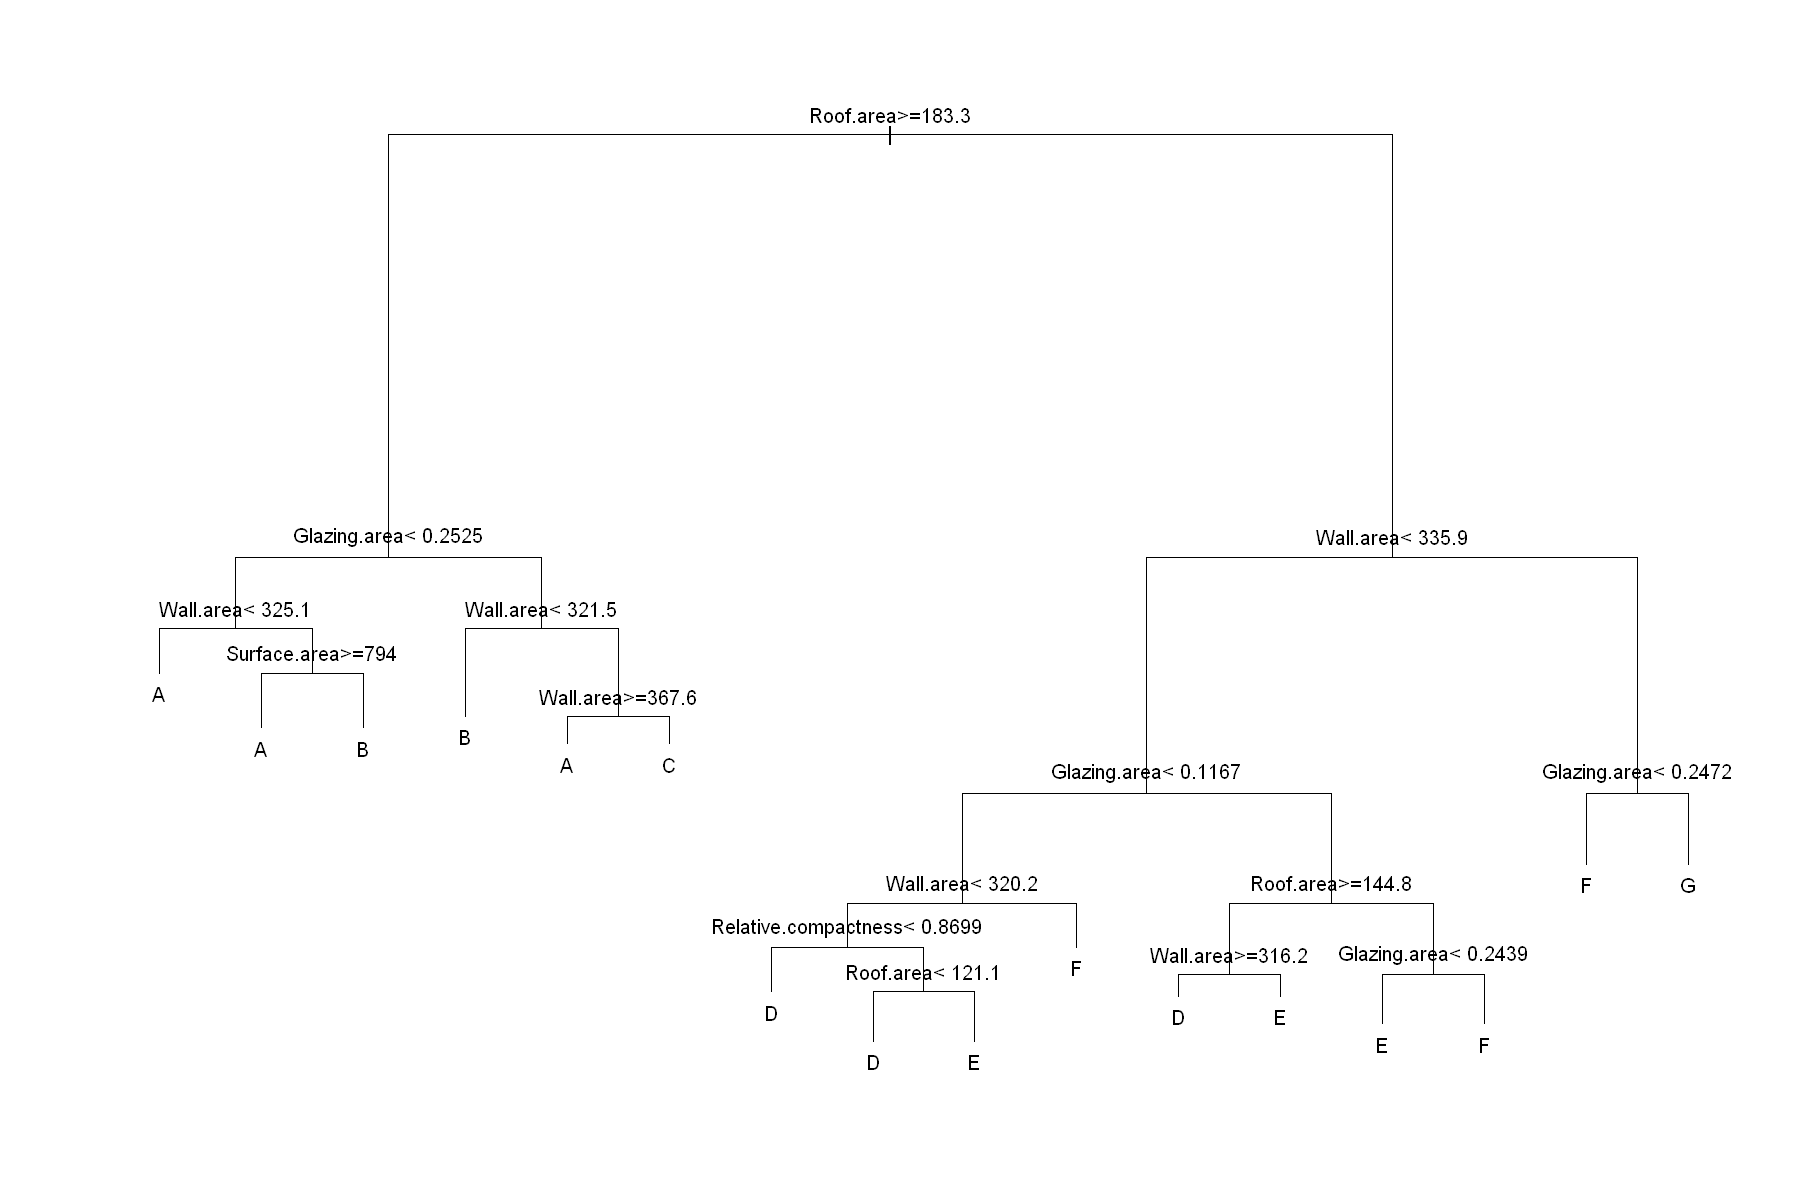

In [34]:
plot(model.Tree)
text(model.Tree)

In [25]:
conf <- confusionMatrix(data = pred_dt, reference = DataTest$Energy.efficiency)
conf

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 44  9  1  0  0  0  0
         B 17 18  8  0  0  0  0
         C  1  4 12  0  0  0  0
         D  0  0  2 12  7  0  3
         E  0  0  1  4 10  6  0
         F  0  1  0  7 15 19 13
         G  0  0  0  0  0  5  8

Overall Statistics
                                          
               Accuracy : 0.5419          
                 95% CI : (0.4746, 0.6079)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4537          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.7097   0.5625  0.50000  0.52174  0.31250   0.6333
Specificity            0.9394   0.8718  0.97537  0.94118  0.94359   0.8173
Pos Pred Value         0.8148   0.41

In [26]:
# F1_score
#install.packages('MLmetrics')
library('MLmetrics')

F1_Score(y_pred = pred_dt, y_true = DataTest$Energy.efficiency)

[1] 0.7586207

#### Optimisation de l'arbre par élagage

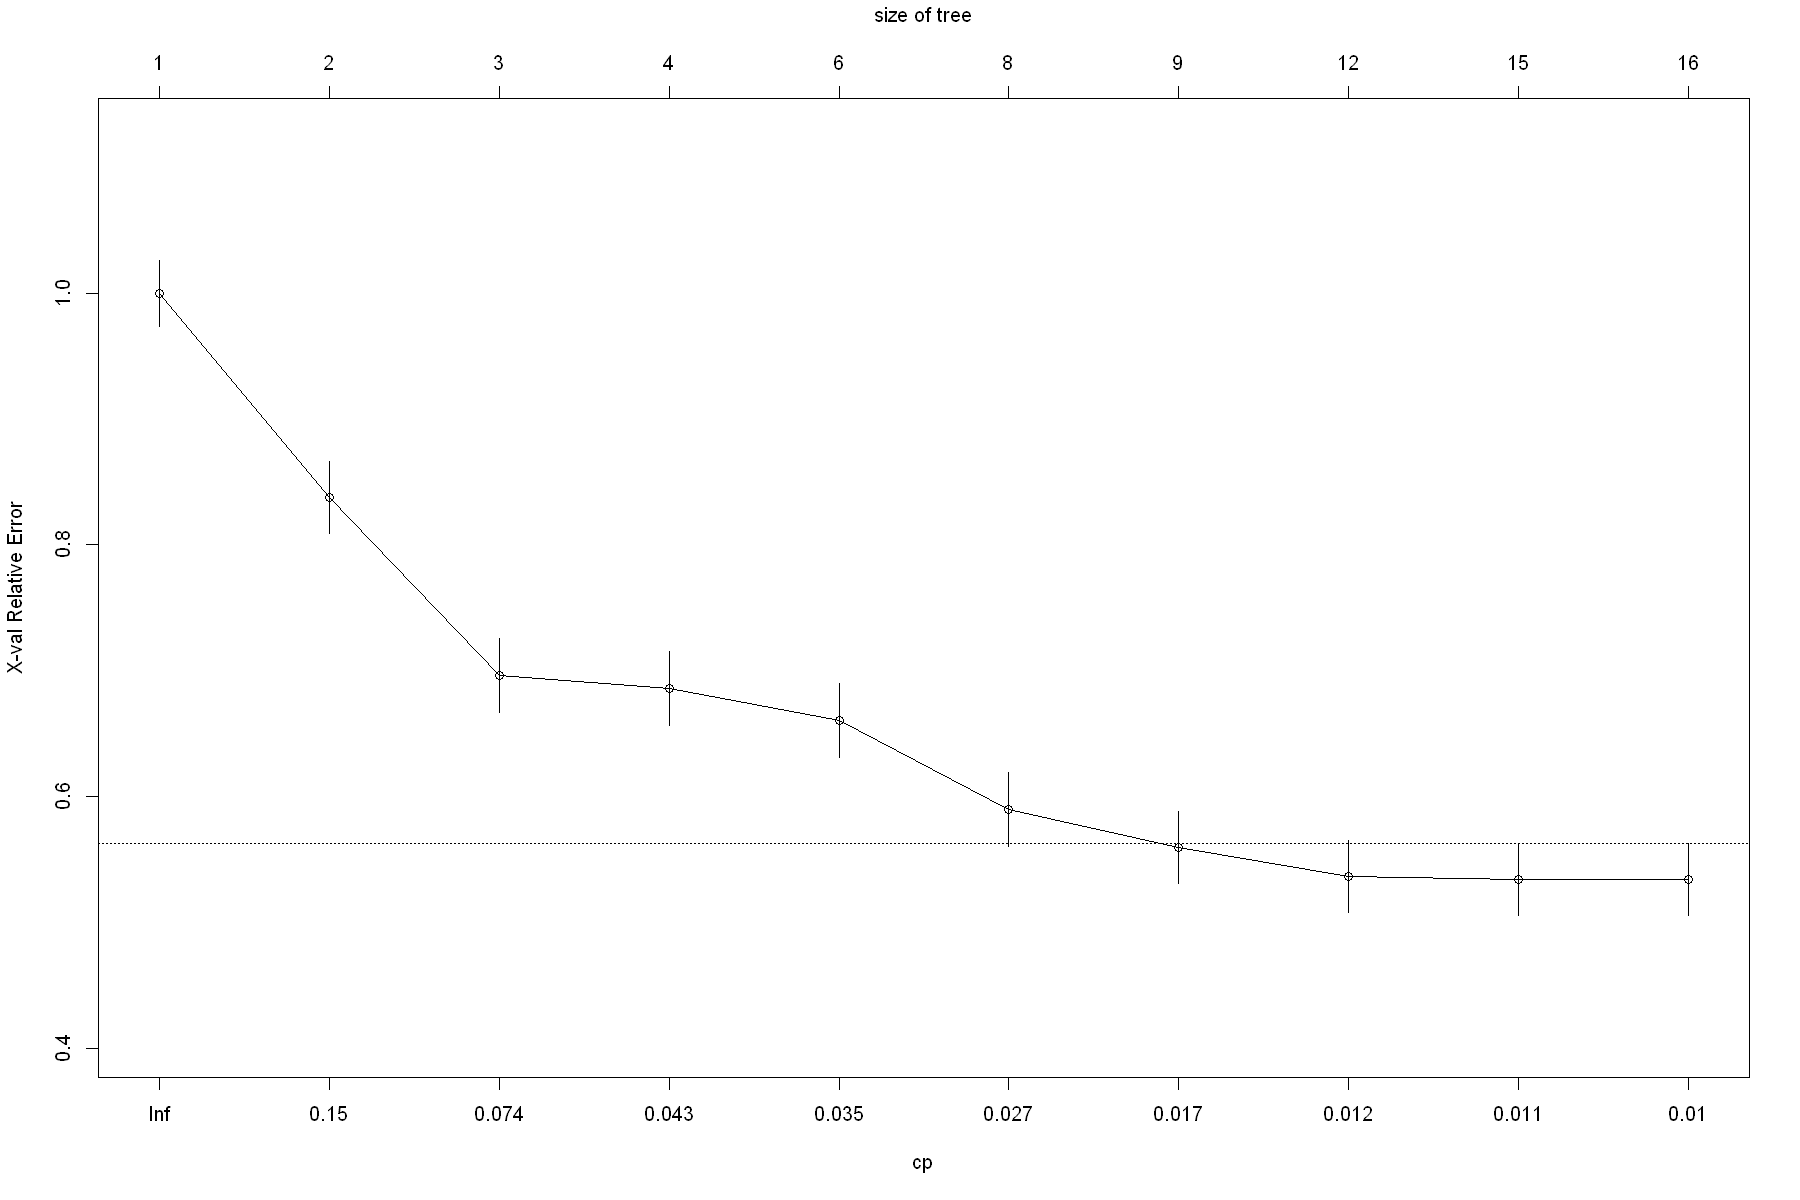

In [27]:
#On cherche à minimiser l’erreur pour définir le niveau d’élagage
plotcp(model.Tree)

On cherche à minimiser l'erreur, on voit donc que le cp minimum est 0.01 pour une taille d'arbre de 16.

In [28]:
#Affichage du cp optimal
print(model.Tree$cptable[which.min(model.Tree$cptable[,4]),1])

[1] 0.01012658


In [29]:
#Elagage de l’arbre avec le cp optimal
model.Tree_Opt <- prune(model.Tree,cp=model.Tree$cptable[which.min(model.Tree$cptable[,4]),1])

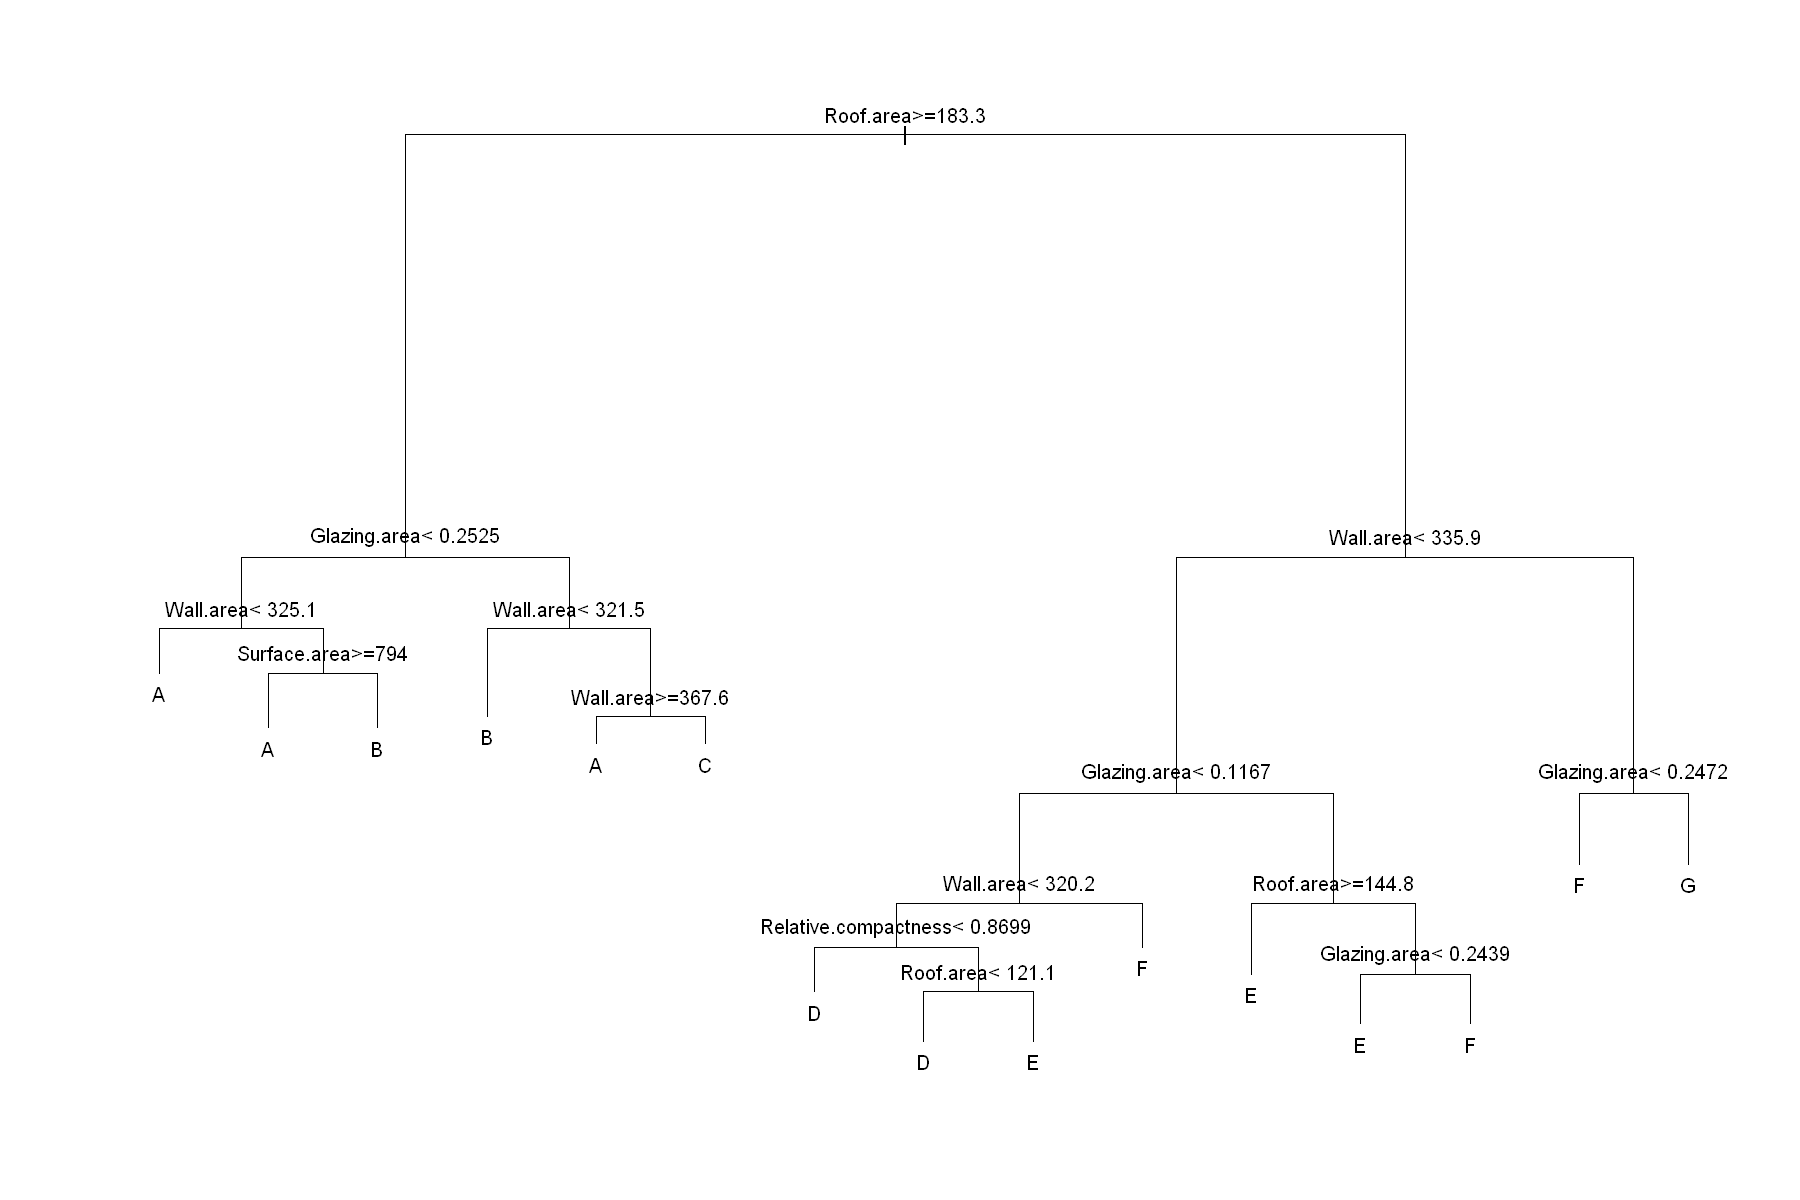

In [37]:
plot(model.Tree_Opt)
text(model.Tree_Opt)

In [38]:
#Prédiction du modèle sur les données de test
predictions<-predict(model.Tree_Opt,newdata=DataTest, type="class")

In [39]:
#Matrice de confusion
conf <- confusionMatrix(data = predictions, reference = DataTest$Energy.efficiency)
conf

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 44  9  1  0  0  0  0
         B 17 18  8  0  0  0  0
         C  1  4 12  0  0  0  0
         D  0  0  2  8  5  0  0
         E  0  0  1  8 12  6  3
         F  0  1  0  7 15 19 13
         G  0  0  0  0  0  5  8

Overall Statistics
                                          
               Accuracy : 0.533           
                 95% CI : (0.4659, 0.5993)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4421          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.7097   0.5625  0.50000  0.34783  0.37500   0.6333
Specificity            0.9394   0.8718  0.97537  0.96569  0.90769   0.8173
Pos Pred Value         0.8148   0.41

In [40]:
# F1_score
library('MLmetrics')

F1_Score(y_pred = predictions, y_true = DataTest$Energy.efficiency)

[1] 0.7586207

## Random Forest

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted        541   factor numeric  
err.rate        4000   -none- numeric  
confusion         56   -none- numeric  
votes           3787   matrix numeric  
oob.times        541   -none- numeric  
classes            7   -none- character
importance         8   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                541   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

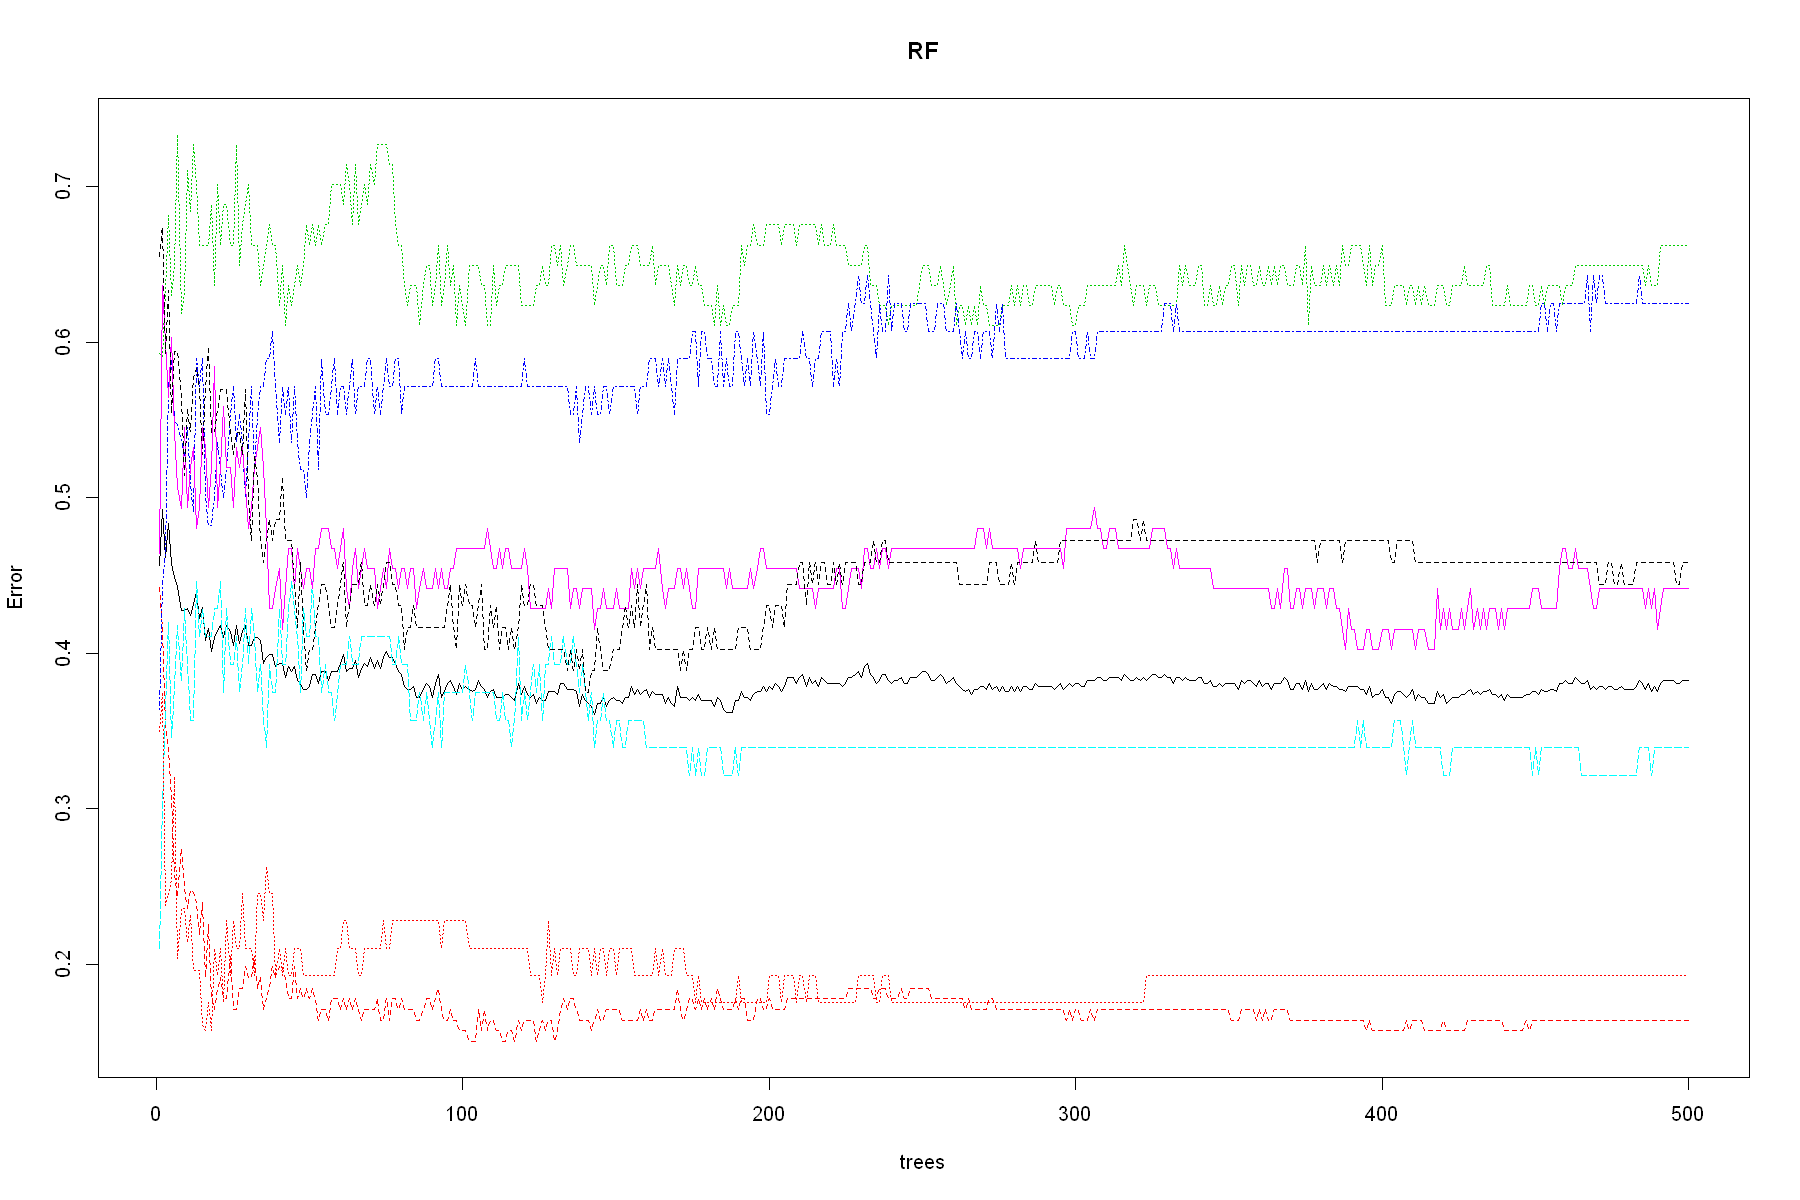

In [41]:

library(randomForest)

RF <- randomForest(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr, data = DataTrain, ntree = 500, na.action = na.omit)

summary(RF)
plot(RF)


#Prediction et performance du Random Forest
pred_rf <- predict(RF,newdata=DataTest, type="class")



In [42]:
conf_rf <- confusionMatrix(data = pred_rf, reference = DataTest$Energy.efficiency)
conf_rf

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 53 16  4  0  0  0  0
         B  9 12  7  0  0  0  0
         C  0  3 10  0  0  0  0
         D  0  1  2 16  9  0  0
         E  0  0  1  5 15 10  1
         F  0  0  0  2  8 12  9
         G  0  0  0  0  0  8 14

Overall Statistics
                                          
               Accuracy : 0.5815          
                 95% CI : (0.5144, 0.6464)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4946          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.8548  0.37500  0.41667  0.69565  0.46875  0.40000
Specificity            0.8788  0.91795  0.98522  0.94118  0.91282  0.90355
Pos Pred Value         0.7260  0.428

In [43]:
# F1_score
#install.packages('MLmetrics')
library('MLmetrics')

F1_Score(y_pred = pred_rf, y_true = DataTest$Energy.efficiency)

[1] 0.7851852

### Optimisation du random forest

In [44]:
# Define the control of the cross validation
trControl <- trainControl(method = "cv",
    number = 3,
    search = "grid")

Nous allons d'abord essayer de trouvé le meilleur mtry : nombre de variables testées à chaque split.

In [45]:
# search best_mtry
set.seed(1234)
tuneGrid <- expand.grid(.mtry = c(1: 8))
rf_mtry <- train(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
    data = DataTrain,
    method = "rf",
    metric = "Accuracy",
    tuneGrid = tuneGrid,
    trControl = trControl,
    importance = TRUE,
    nodesize = 14,
    ntree = 500)
print(rf_mtry)

Random Forest 

541 samples
  8 predictor
  7 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 362, 360, 360 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.4899020  0.3612503
  2     0.5987839  0.5103733
  3     0.6227250  0.5428944
  4     0.6245254  0.5471713
  5     0.6374579  0.5637949
  6     0.6226427  0.5473719
  7     0.6318919  0.5581407
  8     0.6282087  0.5544665

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.


In [46]:
best_mtry = rf_mtry$bestTune$mtry
best_mtry

[1] 5

On cherche maintenant le meilleur max_node -> nombre de feuilles maximales dans chaque arbre de la forêt aléatoire.

In [47]:
store_maxnode <- list()
tuneGrid <- expand.grid(.mtry = best_mtry)
for (maxnodes in c(5: 30)) {
    set.seed(1234)
    rf_maxnode <- train(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
        data = DataTrain,
        method = "rf",
        metric = "Accuracy",
        tuneGrid = tuneGrid,
        trControl = trControl,
        importance = TRUE,
        nodesize = 14,
        maxnodes = maxnodes,
        ntree = 300)
    current_iteration <- toString(maxnodes)
    store_maxnode[[current_iteration]] <- rf_maxnode
}
results_mtry <- resamples(store_maxnode)
summary(results_mtry)


Call:
summary.resamples(object = results_mtry)

Models: 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30 
Number of resamples: 3 

Accuracy 
        Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
5  0.4917127 0.4944751 0.4972376 0.5009723 0.5056020 0.5139665    0
6  0.4860335 0.4888731 0.4917127 0.4916613 0.4944751 0.4972376    0
7  0.4916201 0.5054786 0.5193370 0.5193062 0.5331492 0.5469613    0
8  0.5195531 0.5360196 0.5524862 0.5470333 0.5607735 0.5690608    0
9  0.5139665 0.5498009 0.5856354 0.5654290 0.5911602 0.5966851    0
10 0.5195531 0.5498318 0.5801105 0.5636079 0.5856354 0.5911602    0
11 0.5363128 0.5747863 0.6132597 0.5931356 0.6215470 0.6298343    0
12 0.5251397 0.5664372 0.6077348 0.5838863 0.6132597 0.6187845    0
13 0.5363128 0.5720238 0.6077348 0.5949772 0.6243094 0.6408840    0
14 0.5363128 0.5803111 0.6243094 0.6005021 0.6325967 0.6408840    0
15 0.5474860 0.6024723 0.6574586 0.6226427 0.6602210 0.662983

In [48]:
best_maxnodes = 28 # La moyenne de l'accuracy est la meilleure pour max_nodes=28

Nous allons maintenant optimiser l'hyperparamètre maxtree qui est le nombre d'arbre dans la forêt aléatoire.

In [49]:
store_maxtrees <- list()
for (ntree in c(50, 100, 200, 250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000)) {
    set.seed(5678)
    rf_maxtrees <- train(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
        data = DataTrain,
        method = "rf",
        metric = "Accuracy",
        tuneGrid = tuneGrid,
        trControl = trControl,
        importance = TRUE,
        nodesize = 14,
        maxnodes = 28,
        ntree = ntree)
    key <- toString(ntree)
    store_maxtrees[[key]] <- rf_maxtrees
}
results_tree <- resamples(store_maxtrees)
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 50, 100, 200, 250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000 
Number of resamples: 3 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
50   0.5856354 0.6056668 0.6256983 0.6155643 0.6305287 0.6353591    0
100  0.6022099 0.6077348 0.6132597 0.6211714 0.6306522 0.6480447    0
200  0.5911602 0.6049724 0.6187845 0.6211920 0.6362079 0.6536313    0
250  0.5856354 0.6132597 0.6408840 0.6304413 0.6528442 0.6648045    0
300  0.5966851 0.6160221 0.6353591 0.6304207 0.6472885 0.6592179    0
350  0.5856354 0.6022099 0.6187845 0.6230748 0.6417945 0.6648045    0
400  0.5966851 0.6132597 0.6298343 0.6323035 0.6501127 0.6703911    0
450  0.5966851 0.6104972 0.6243094 0.6304618 0.6473502 0.6703911    0
500  0.5966851 0.6104972 0.6243094 0.6360484 0.6557301 0.6871508    0
550  0.5966851 0.6132597 0.6298343 0.6341657 0.6529060 0.6759777    0
600  0.6022099 0.6160221 0.6298343 0.6322829 0.6473194 0.6648045   

250 abres parait idéal.

Nous allons maintenant tester notre modèle optimal.

In [50]:
fit_rf <- train(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
    DataTrain,
    method = "rf",
    metric = "Accuracy",
    tuneGrid = tuneGrid,
    trControl = trControl,
    importance = TRUE,
    ntree = 250,
    maxnodes = best_maxnodes)

In [51]:
predictions_rf <-predict(fit_rf, DataTest)

In [52]:
conf_rf <- confusionMatrix(data = predictions_rf, reference = DataTest$Energy.efficiency)
conf_rf

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 54 14  4  0  0  0  0
         B  7 12  5  0  0  0  0
         C  1  5 12  0  0  0  0
         D  0  1  1 15  7  0  0
         E  0  0  2  6 16  8  1
         F  0  0  0  2  9 15  9
         G  0  0  0  0  0  7 14

Overall Statistics
                                          
               Accuracy : 0.6079          
                 95% CI : (0.5411, 0.6719)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5269          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.8710  0.37500  0.50000  0.65217  0.50000  0.50000
Specificity            0.8909  0.93846  0.97044  0.95588  0.91282  0.89848
Pos Pred Value         0.7500  0.500

In [53]:
library('MLmetrics')

F1_Score(y_pred = predictions_rf, y_true = DataTest$Energy.efficiency)

[1] 0.8059701

## SVC : support vecteur classifier

Pour la partie SVM, nous allons essayer deux kernels différents qui sont le kernel linéaire et le kernel polynomial. Nous allons ensuite optimiser leurs hyperparamètres : gamma, la pénalité (et le degrés pour le kernel polynomial) en utilisant directement la validation croisée.

#### SVM linéaire

In [54]:
# Create a linear SVM 
tune(svm, 
     Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                  Overall.height+orientation+Glazing.area+Glazing.area.distr, 
     data = DataTrain,
     ranges = list(gamma = 2^(1:10), cost = 2^(1:10)),
     tunecontrol = tune.control(nrepeat = 10, sampling = "cross", cross = 10))


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
     2    2

- best performance: 0.6710438 


Nous avons comme meilleurs paramètres de ce SVM linéaire : 
- Gamma = 2
- Cout = 4

#### SVM polynomial

In [55]:
# Create a polynomial SVM 
tune(svm, 
     Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                  Overall.height+orientation+Glazing.area+Glazing.area.distr, 
     data = DataTrain,
     kernel="polynomial",
     ranges = list(gamma = 2^(1:5), cost = 2^(1:5), degree=(2:5)),
     tunecontrol = tune.control(nrepeat = 10, sampling = "cross", cross = 3))


Parameter tuning of 'svm':

- sampling method: 3-fold cross validation 

- best parameters:
 gamma cost degree
     2    2      4

- best performance: 0.4694803 


La performance du SVM polynomial est faible. On utilisera donc le SVM optimisé pour le test.

In [56]:
svm.lin.opt = svm(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                  Overall.height+orientation+Glazing.area+Glazing.area.distr,
                  kernel = "linear", gamma = 2, cost = 4,
                 data=DataTrain)
predictions_svm <-predict(svm.lin.opt, DataTest)
conf_svm <- confusionMatrix(data = predictions_svm, reference = DataTest$Energy.efficiency)
conf_svm

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 54 13  5  0  0  0  0
         B  8 14 12  0  0  0  0
         C  0  5  4  0  1  0  0
         D  0  0  3 11  8  2  1
         E  0  0  0  8 13  9  3
         F  0  0  0  2  5 12  4
         G  0  0  0  2  5  7 16

Overall Statistics
                                         
               Accuracy : 0.5463         
                 95% CI : (0.479, 0.6122)
    No Information Rate : 0.2731         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4524         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.8710  0.43750  0.16667  0.47826  0.40625  0.40000
Specificity            0.8909  0.89744  0.97044  0.93137  0.89744  0.94416
Pos Pred Value         0.7500  0.41176  0.400

In [57]:
# F1_score

library('MLmetrics')

F1_Score(y_pred = predictions_svm, y_true = DataTest$Energy.efficiency)

[1] 0.8059701

# Boosting

Pour la partie boosting, nous allons utiliser l'adaboost classifieur. Nous allons directement essayer d'optimiser les hyperparamètres :
- tree_depth : la profondeur de l'arbre à utiliser.
- n_rounds : le nombre de tours de boosting.

Nous allons donc les optimiser grâce à une validation croisée.

In [58]:
# install.packages("adabag")
# install.packages("doParallel")

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'doParallel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpIBF41x\downloaded_packages


In [ ]:
# adaboost(X, y, tree_depth = 3, n_rounds = 100, verbose = FALSE,
#   control = NULL)
# library("adaboost")
library("adabag")
library("doParallel")
tune( boosting, 
     Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                  Overall.height+orientation+Glazing.area+Glazing.area.distr, 
     data = DataTrain,
     ranges = list(tree_depth = (1:10), cost = c(50, 100, 150, 200, 250, 300)),
     tunecontrol = tune.control(nrepeat = 10, sampling = "cross", cross = 3))
